<a href="https://colab.research.google.com/github/AmnahAli/Data_Mining-/blob/master/K_NN_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**#  Assignment #1  :**

  The goal of this assignment is to learn about the kNN.    Implementation of kNN Algorithm using Python.

In [ ]:
import numpy as np
import math
import collections
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# **1**.

In [ ]:
# initialize the parameters to generate 2D Gaussian random samples
mean0 = np.array([1,0])
mean1 = np.array([0,1])
sigma0= np.array([[1,0.75],[0.75,1]])       #cov1
sigma1= np.array([[1,-0.5],[0.5,1]])        #cov2

In [ ]:
# generate the first training sample cluster with lables 0
x0 = np.random.multivariate_normal(mean0, sigma0, size=200)
y0= np.zeros(200).reshape((200, 1))
trainset0 = np.append(x0, y0, axis=1)

# generate the second training sample cluster with lables 0
x1 = np.random.multivariate_normal(mean1, sigma1, size=200)
y1= np.ones(200).reshape((200, 1))
trainset1 = np.append(x1, y1, axis=1)

train = np.append(trainset0, trainset1, 0)
train = shuffle(train)
#print(train[195:205,:])

In [ ]:
x_train = train[:,:2]
y_train = train[:,2]
#len(trainset0[:50,2].tolist())

In [ ]:
# generate the first testing sample cluster with lables 0
X0 = np.random.multivariate_normal(mean0, sigma0, size=50)
Y0= np.zeros(50).reshape((50, 1))
testset0 = np.append(X0, Y0, axis=1)

# generate the second testing sample cluster with labels 1
X1 = np.random.multivariate_normal(mean1, sigma1, size=50)
Y1= np.ones(50).reshape((50, 1))
testset1=np.append(X1, Y1, axis=1)

test = np.append(testset0, testset1, 0)
test = shuffle(test)
#print(test[45:55,:])

In [ ]:
x_test = test[:,:2]
y_test = test[:,2]
#len(trainset0[:50,2].tolist())

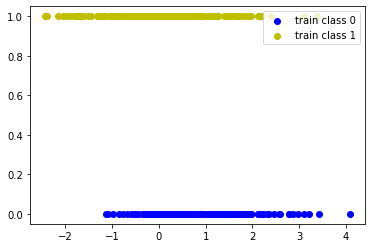

In [ ]:
ax = plt.gca()
ax.scatter(x0[:,0], y0, color="b" , marker="o", label='train class 0')
ax.scatter(x1[:,0], y1, color="y" , marker="o", label='train class 1')
plt.legend(loc='upper right');
plt.show()

In [ ]:
class myknnclassify:
  def __init__(self,train, test, k):
    self.x= train
    self.y= test
    self.k=k

  def l2_norm(self, x, y):          
    distance = 0.0
    for i in range(len(x)):
        distance += (x[i] - y[i])**2
    return np.sqrt(distance)


  def k_nn(self,train, test_sample, k):
    distances = []
    neighbors = []
    for x in train:
      distance = self.l2_norm(test_sample, x)
      distances.append((x, distance))
    distances.sort(key=lambda x: x[1])                     
    for i in range(k):
      neighbors.append(distances[i][0])
    return neighbors


  def predict_class(self,train, test_sample, k):
    neighbors = self.k_nn(train, test_sample, k)
    neighbors_votes = [i[-1] for i in neighbors]
    vote = max(set(neighbors_votes), key=neighbors_votes.count)
    return vote         


  def predictAll(self, train, test, k):
    predictions = []
    for y in test:
      output = self.predict_class(train, y, k)
      predictions.append(output)
    return predictions  


  def accuracy(self, actual, predictions):
    correct = 0
    for i in range(len(actual)):
      if actual[i][-1] == predictions[i]:
        correct += 1
    return correct / float(len(actual)) * 100.0    

In [ ]:
# Dummy data 
dataset = [[2.7810836,2.550537003,1],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,1],
	[7.627531214,2.759262235,0],
	[5.332441248,2.088626775,0],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,0],
	[7.673756466,3.508563011,1]]

dataset1 = [[-0.2840508,  -0.8855585],
 [ 0.84609114,  0.94227464],
 [ 0.28203422, -0.3234563],
 [-0.23012357,  2.06898195],
 [ 3.00304963,  1.97406139],
	[-0.73911572, -0.93004068],
 [-0.37804483, -1.51213788],
 [ 1.14752846 , 0.24181484],
 [ 2.54920662, 0.9561845],
 [ 0.99280785, -1.03087946]]

dum = myknnclassify(dataset,dataset1,1)


p= dum.k_nn(dataset, dataset1[0], 3)
print(p)
a = dum.predict_class(dataset, dataset1[0], 3)
print(a)

k = [1, 2, 3, 4, 5, 10]
for i in range(len(k)): 
  predicted = dum.predictAll(dataset, dataset1, k[i])
  acc =  dum.accuracy(dataset, predicted)
  print("k=",k[i],"\t","	Acurracy :", str(acc) + "%", predicted)

# for i in range(100):
# 	neb = dum.k_nn(train, test[i], 3)		  
# 	print(neb)

v1=[]
for i in range(100):
	v = dum.predict_class(train, test[i], 3)
	v1.append(v)
	#print(v)
acc =  clf.accuracy(test, v1)
print(acc)

[[1.38807019, 1.850220317, 0], [1.465489372, 2.362125076, 0], [2.7810836, 2.550537003, 1]]
0
k= 1 	 	Acurracy : 70.0% [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
k= 2 	 	Acurracy : 70.0% [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
k= 3 	 	Acurracy : 70.0% [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
k= 4 	 	Acurracy : 60.0% [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
k= 5 	 	Acurracy : 60.0% [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
k= 10 	 	Acurracy : 60.0% [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
100.0


In [ ]:
clf = myknnclassify(x,y,1)

k = [1, 2, 3, 4, 5, 10, 20]
for i in range(len(k)): 
  predicted= clf.predictAll(train[:100], test, k[i])
  acc =  clf.accuracy(dataset, predicted)
  print("k=",k[i],"\t","	Acurracy :", str(acc) + "%")

k= 1 	 	Acurracy : 50.0%
k= 2 	 	Acurracy : 50.0%
k= 3 	 	Acurracy : 50.0%
k= 4 	 	Acurracy : 50.0%
k= 5 	 	Acurracy : 50.0%
k= 10 	 	Acurracy : 50.0%
k= 20 	 	Acurracy : 50.0%


In [ ]:
clf = myknnclassify(train,test,1)
predictions=[]
k = [1, 2, 3, 4, 5, 10, 20]
for i in range(len(k)): 
  for rec in range(len(test)):
    predicted= clf.predict_class(train, test[rec], k[i])
    predictions.append(predicted)
  acc =  clf.accuracy(test, predictions)
  print("k=",k[i],"\t","	Acurracy :", str(acc) + "%")

k= 1 	 	Acurracy : 100.0%
k= 2 	 	Acurracy : 100.0%
k= 3 	 	Acurracy : 100.0%
k= 4 	 	Acurracy : 100.0%
k= 5 	 	Acurracy : 100.0%
k= 10 	 	Acurracy : 100.0%
k= 20 	 	Acurracy : 100.0%


In [ ]:
clf = myknnclassify(train,test,1)
predictions=[]
k = [1, 2, 3, 4, 5, 10, 20]
for i in range(len(k)): 
  for rec in range(len(test)):
    predicted= clf.predict_class(train,  x_test[rec], k[i])
    predictions.append(predicted)
  acc =  clf.accuracy(test, predictions)
  print("k=",k[i],"\t","	Acurracy :", str(acc) + "%")

k= 1 	 	Acurracy : 79.0%
k= 2 	 	Acurracy : 79.0%
k= 3 	 	Acurracy : 79.0%
k= 4 	 	Acurracy : 79.0%
k= 5 	 	Acurracy : 79.0%
k= 10 	 	Acurracy : 79.0%
k= 20 	 	Acurracy : 79.0%


# **2.**

In [ ]:
# initialize the parameters to generate 2D Gaussian random samples
mean = np.array([1,0])
sigma= np.array([[1,0.75],[0.75,1]])       #cov

In [ ]:
# generate the first training sample 
epsilon = np.random.normal(mean, 0.5, size=(300, 1))
x = np.random.multivariate_normal(mean, sigma, size=300)
y= np.sum(2*x[:,0] + x[:,1] +  epsilon, axis=0).reshape((300, 1))
train = np.append(x, y, axis=1)

In [ ]:
train[:10]

array([[ 4.05141403e-01, -2.07511309e-01,  3.13866579e+02],
       [-6.14952595e-01, -2.97101650e+00, -1.12724138e+03],
       [ 1.33077361e+00,  1.76118132e+00,  1.45985369e+03],
       [ 1.24540561e-01,  2.09175244e-01,  2.70512040e+02],
       [ 1.39760148e+00,  3.81618860e-01,  1.08608167e+03],
       [ 3.06329176e+00,  1.66653825e+00,  2.47097166e+03],
       [ 4.84507461e-01, -5.62906673e-01,  2.54867605e+02],
       [-7.94954994e-01, -1.90010928e+00, -9.13970651e+02],
       [ 7.96163371e-01, -3.08395023e-01,  5.18214646e+02],
       [ 2.56275657e-01,  2.00527893e-01,  3.46958892e+02]])

In [ ]:
#Regression by taking mean from neighbors
def getRegression(neighbors):
	neighbors_votes = [row[-1] for row in neighbors]
	return sum(neighbors_votes) / float(len(neighbors_votes))
 

**Refrenecs:**

    * https://arxiv.org/pdf/1708.04321.pdf
    * https://www.kaggle.com/ptdrowk-nearest-neighbors-classifier-from-scratchdata
    * https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

k= 1 	 	Acurracy : 79.0%
k= 2 	 	Acurracy : 79.0%
k= 3 	 	Acurracy : 79.0%
k= 4 	 	Acurracy : 79.0%
k= 5 	 	Acurracy : 79.0%
k= 10 	 	Acurracy : 79.0%
k= 20 	 	Acurracy : 79.0%
